In [45]:
# Import necessary librares

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Read the data

In [2]:
# Read the data
data = pd.read_csv('winequality-red.csv')

# See the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Examine the statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Quality values ranges from 3 to 8:

In [5]:
# Show output values
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

# 2. Data Analysis

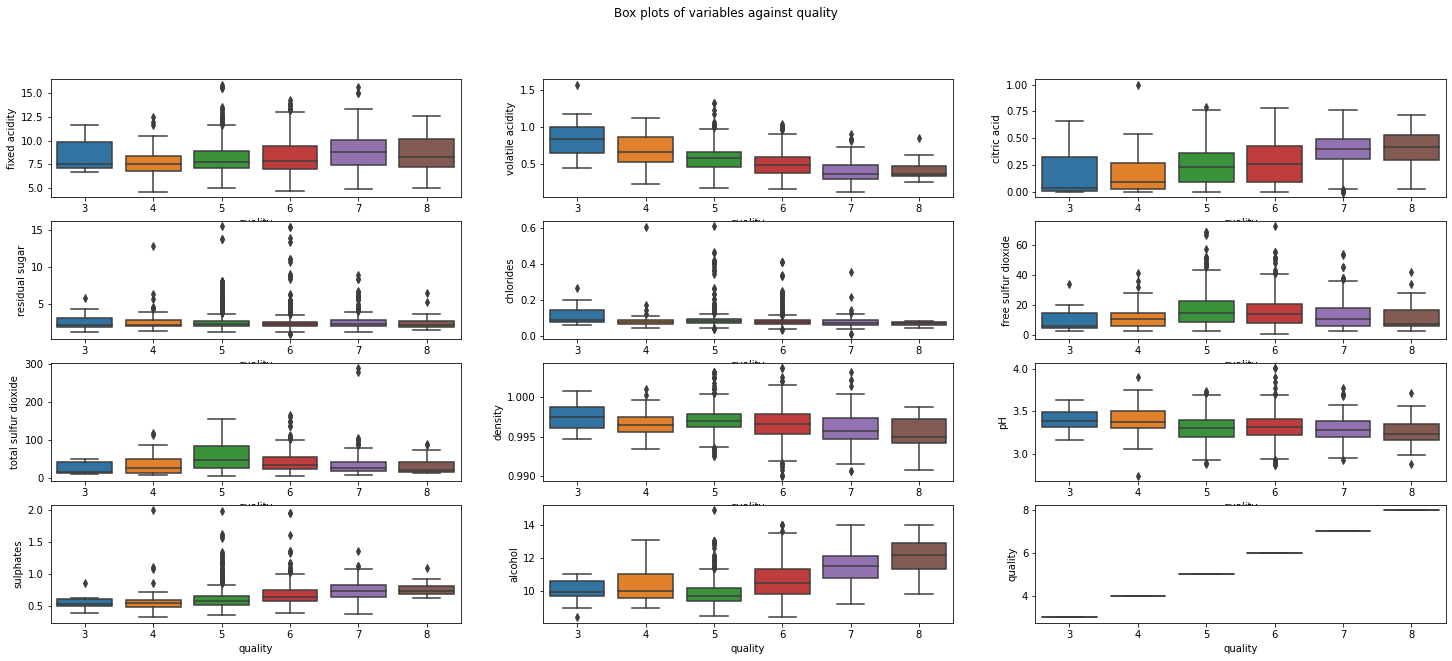

In [6]:
# Define the number of rows and columns for the subplot
nrows, ncols = 4, 3

# Create the subplot using the defined number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 10))

# Define the columns to plot
cols_to_plot = data.columns

# Loop through each column and plot it against the quality column
for i, col in enumerate(cols_to_plot):
    row_idx = i // ncols
    col_idx = i % ncols
    sns.boxplot(x='quality', y=col, data=data, ax=axes[row_idx][col_idx])
    
# Add a title for the entire plot
fig.suptitle('Box plots of variables against quality')

# Show the plot
plt.show()

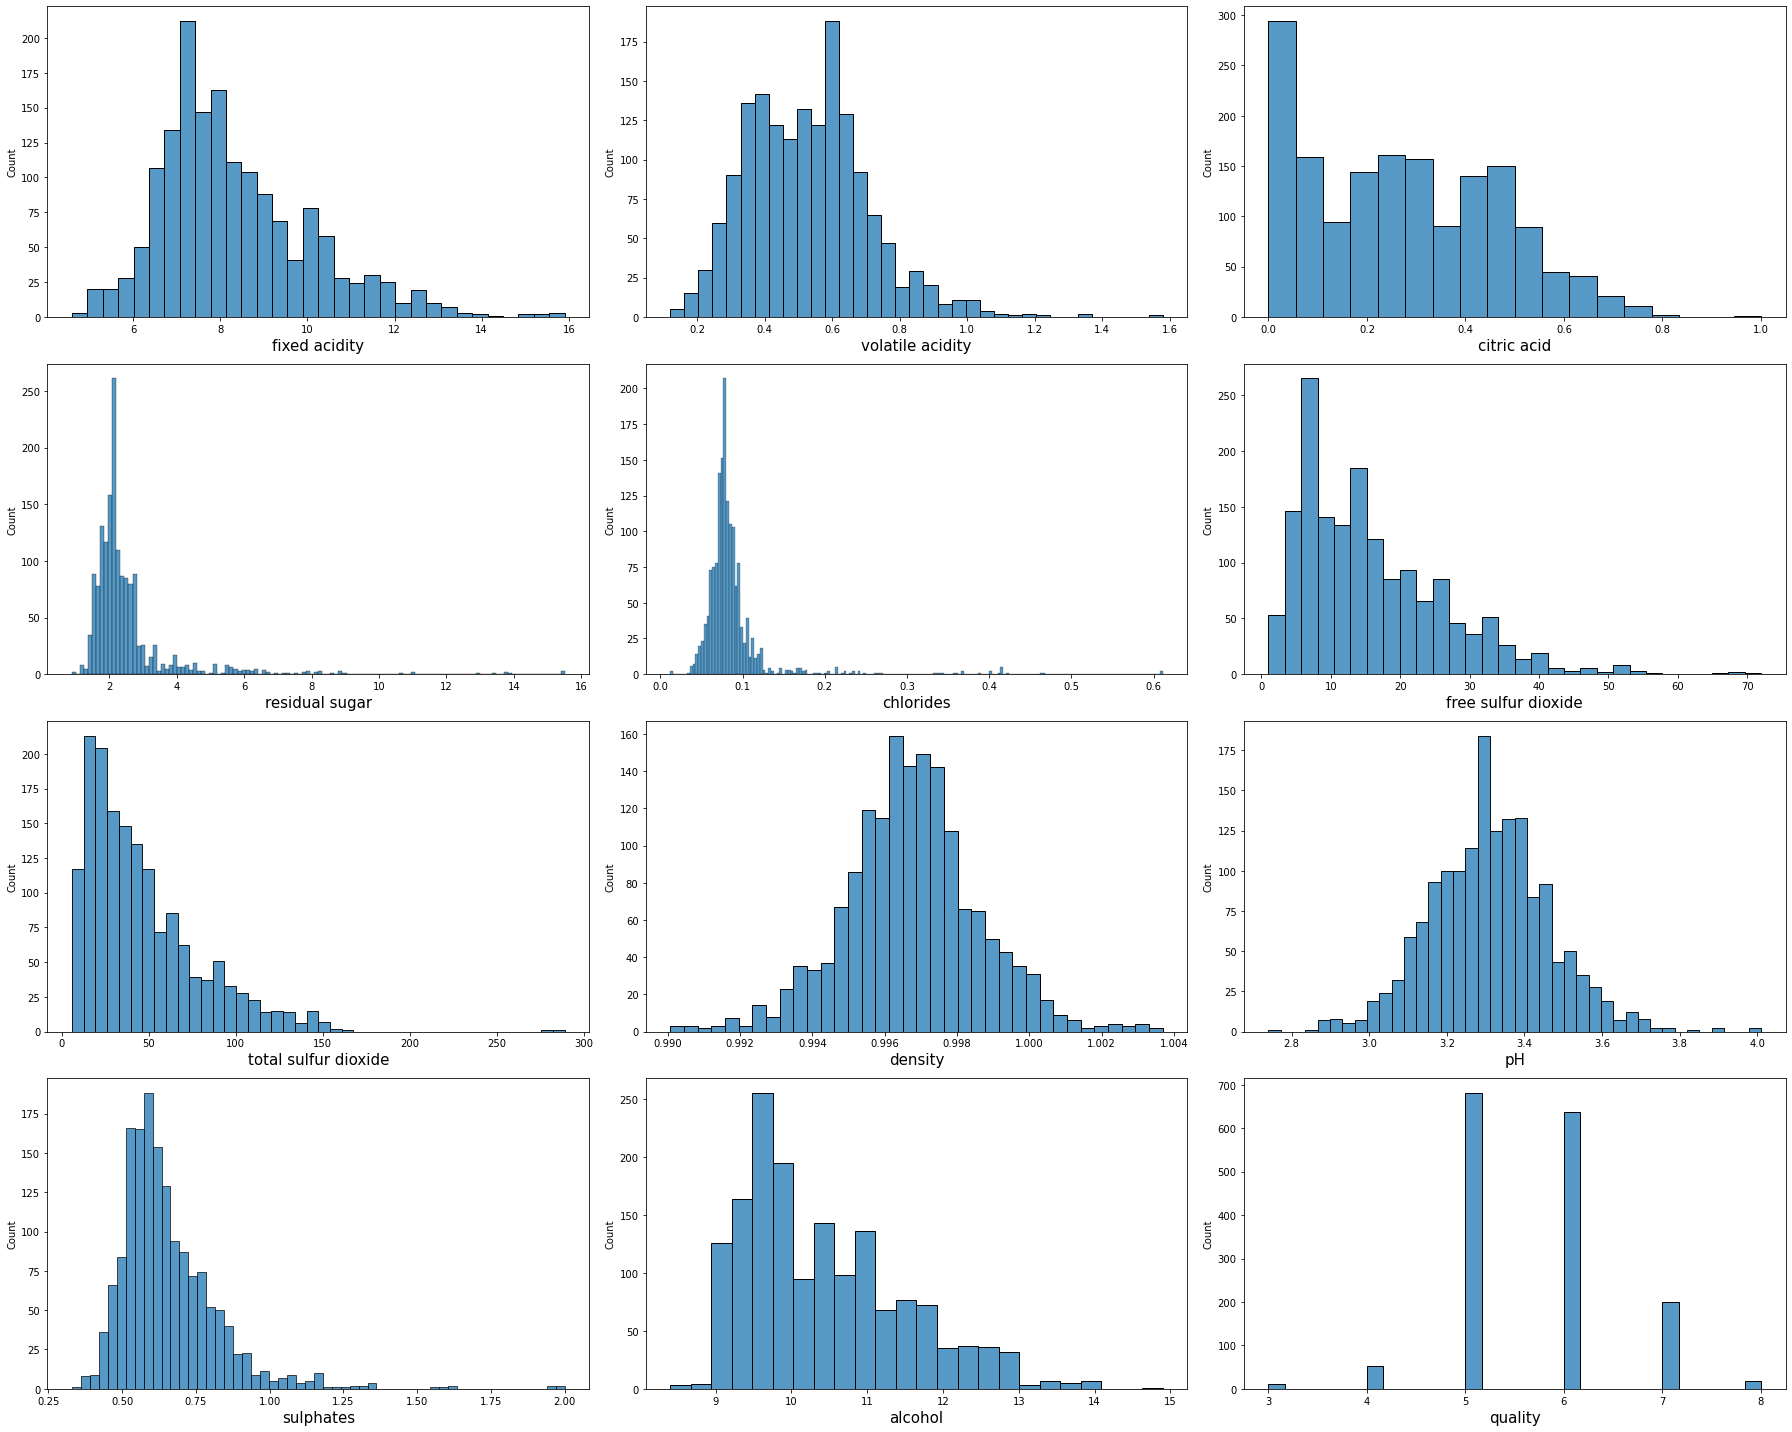

In [7]:
# Set the figure size
plt.figure(figsize=(25, 20))

# Initialize plot counter
plotnumber = 1

# Iterate over the columns of the dataframe
for col in data.columns:
    
    # Limit the number of subplots to 12
    if plotnumber <= 12:
        
        # Create a new subplot
        ax = plt.subplot(4, 3, plotnumber)
        
        # Plot the histogram using seaborn
        sns.histplot(data[col], ax=ax)
        
        # Label the x-axis with the column name
        plt.xlabel(col, fontsize=15)
        
        # Increment the plot counter
        plotnumber += 1
    
# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

<AxesSubplot:>

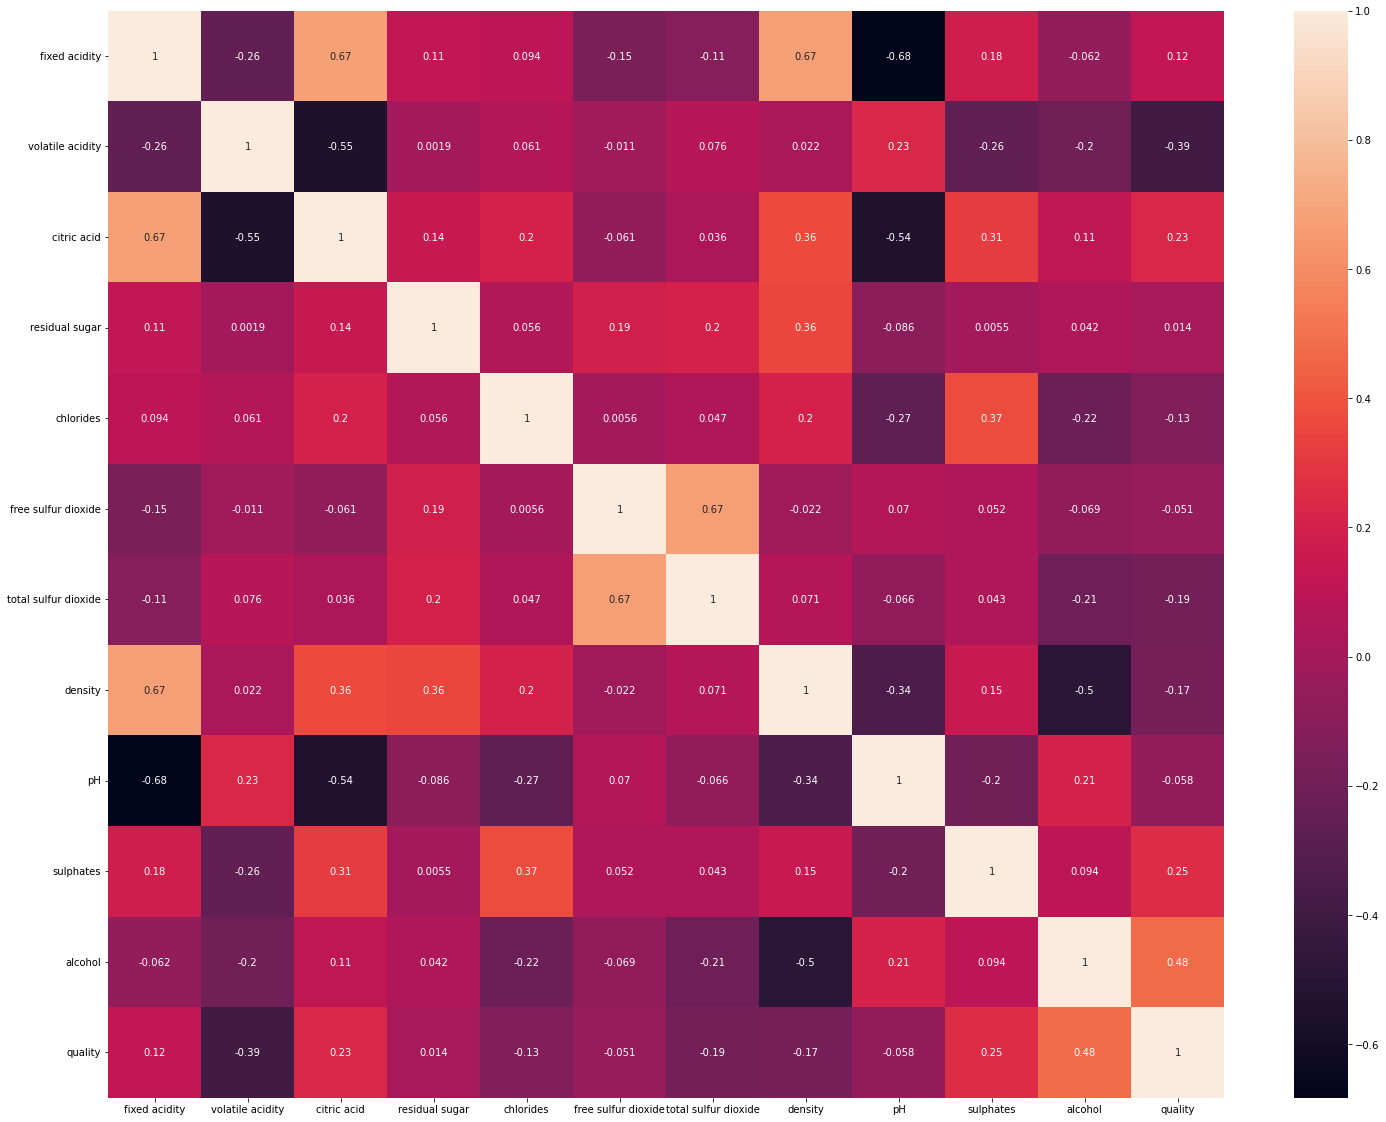

In [8]:
# Pearson Correlation
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)

## Findings from Data Analysis
* Based on the data analysis performed, it was found that certain columns contained outliers which could negatively impact the accuracy of the model. To address this issue, min-max scaling will be used as a normalization technique. By squeezing the data values between 0 and 1, this method effectively removes the impact of outliers and allowes for uniformity of scales across all features. This is important because the different value ranges of the features could lead to problems during model training.

* Additionally, the Pearson Correlation plot was used to investigate the presence of highly correlated features. It was observed that none of the features were highly correlated (using a threshold value of 0.8), indicating that each feature provided unique and valuable information that should be retained in the model.

*  Also, since some features have low correlation (< 0.3), it is reasonable not to use PCA, as it is generally used to reduce dimensionality when there are too many features or when there is high correlation between them.

# 3. Preprocessing

In [9]:
# Convert continuous output to categorical output:
# Bad: 3-5
# Good: 6-8
data["quality"] = pd.cut( data["quality"], bins = [2, 5, 8], labels = ["bad", "good"])
# Show output frequency
data["quality"].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [10]:
lb = LabelEncoder()
data["quality"] = lb.fit_transform(data["quality"])

In [11]:
# Seperate the dataset as features and output variable
X = data.drop("quality", axis = 1)
y = data["quality"]

In [12]:
# Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
print(Counter(y_train))

Counter({1: 676, 0: 603})


As we see, we have imbalances classes. Since the class imbalance is not very high (855 vs 744), undersampling may not be the best option, as it may lead to a significant loss of information. However, oversampling or SMOTE can be used to increase the number of samples in the minority class. Therefore, we will try both oversampling and SMOTE techniques, and compare their performance.

## 4. Models with Oversampling

In [13]:
# Concatenate the training data back together
X_resample = pd.concat([X_train, y_train], axis = 1)
good_quality = X_resample[X_resample["quality"] == 1]
bad_quality = X_resample[X_resample["quality"] == 0]

# Upsample minority
bad_quality_oversampled = resample(bad_quality, replace=True, n_samples=len(good_quality), random_state=42)
oversampled_data = pd.concat([good_quality, bad_quality_oversampled])

In [14]:
# See class counts
oversampled_data.quality.value_counts()

1    676
0    676
Name: quality, dtype: int64

Now we have balanced classes!

In [15]:
# Separate the oversampled data into features and output variable
X_train_oversampled = oversampled_data.drop("quality", axis = 1)
y_train_oversampled = oversampled_data["quality"]

In [16]:
# Scale the data
scaler = MinMaxScaler()
X_train_oversampled = scaler.fit_transform(X_train_oversampled)
X_test = scaler.transform(X_test)

## 4.1 Random Forest Classifier (on oversampled data)

In [17]:
rfc_oversampled = RandomForestClassifier(n_estimators=100)
rfc_oversampled.fit(X_train_oversampled, y_train_oversampled)
rfc_y_hat = rfc_oversampled.predict(X_test)

In [18]:
print(classification_report(y_test, rfc_y_hat))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       141
           1       0.78      0.89      0.83       179

    accuracy                           0.80       320
   macro avg       0.80      0.78      0.79       320
weighted avg       0.80      0.80      0.79       320



In [19]:
print(confusion_matrix(y_test, rfc_y_hat))

[[ 96  45]
 [ 20 159]]


## 4.2 Decision Tree (on oversampled data)

In [20]:
dt_oversampled = DecisionTreeClassifier()
dt_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_hat = dt_oversampled.predict(X_test)

In [21]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       141
           1       0.76      0.80      0.78       179

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320



In [22]:
print(confusion_matrix(y_test, y_hat))

[[ 96  45]
 [ 35 144]]


## 4.3 Logistic Regression (on oversampled data)

In [23]:
lr_oversampled = SGDClassifier(loss="log")
lr_oversampled.fit(X_train_oversampled, y_train_oversampled)
lr_y_hat = lr_oversampled.predict(X_test)

In [24]:
print(classification_report(y_test, lr_y_hat))

              precision    recall  f1-score   support

           0       0.60      0.89      0.71       141
           1       0.86      0.53      0.66       179

    accuracy                           0.69       320
   macro avg       0.73      0.71      0.68       320
weighted avg       0.74      0.69      0.68       320



In [25]:
print(confusion_matrix(y_test, lr_y_hat))

[[125  16]
 [ 84  95]]


## 5 Models with SMOTE

In [26]:
# Now, apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_sm))

Original dataset shape Counter({1: 676, 0: 603})
Resampled dataset shape Counter({1: 676, 0: 676})


In [27]:
# Scale the data
X_train_sm = scaler.fit_transform(X_train_sm)

## 5.1 Random Forest Classifier (using SMOTE)

In [28]:
smote_rfc = RandomForestClassifier(n_estimators=100)
smote_rfc.fit(X_train_sm, y_train_sm)
smote_pred = smote_rfc.predict(X_test)

In [29]:
print(classification_report(y_test, smote_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       141
           1       0.82      0.77      0.79       179

    accuracy                           0.78       320
   macro avg       0.77      0.78      0.77       320
weighted avg       0.78      0.78      0.78       320



In [30]:
print(confusion_matrix(y_test, smote_pred))

[[111  30]
 [ 42 137]]


## 5.2 Decision Tree (using SMOTE)

In [31]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_sm, y_train_sm)
dt_smote_y_hat = dt_smote.predict(X_test)

In [32]:
print(classification_report(y_test, dt_smote_y_hat))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       141
           1       0.70      0.64      0.67       179

    accuracy                           0.65       320
   macro avg       0.65      0.65      0.65       320
weighted avg       0.65      0.65      0.65       320



In [33]:
print(confusion_matrix(y_test, dt_smote_y_hat))

[[ 93  48]
 [ 65 114]]


## 5.3 Logistic Regression (using SMOTE)

In [34]:
lr_smote = SGDClassifier(loss="log")
lr_smote.fit(X_train_sm, y_train_sm)
lr_smote_y_hat = lr_smote.predict(X_test)

In [35]:
print(classification_report(y_test, lr_smote_y_hat))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       141
           1       0.76      0.78      0.77       179

    accuracy                           0.74       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.74      0.74       320



In [36]:
print(confusion_matrix(y_test, lr_smote_y_hat))

[[ 96  45]
 [ 39 140]]


# Selecting the optimal model and conducting additional fine-tuning

The comparison of the models using oversampling and SMOTE techniques suggests that Random Forest Classifier model appears to be the most promising to fine-tune further.

Comparing the oversampling and SMOTE results for RFC, the f1-score for the class (1) is higher when using oversampling (0.83) compared to using SMOTE (0.79). Additionally, the recall for the class (1) is also higher for the oversampling results compared to SMOTE results. The confusion matrix also indicates a better performance for the RFC model when using oversampling. When we compare the class (0), there is almost no difference between the RFC models.

Similarly, the Decision Tree model appears to perform better when using oversampling. The f1-score for the class (1) is higher when using oversampling (0.78) compared to using SMOTE (0.67). The confusion matrix also indicates a better performance for the Decision Tree model when using oversampling.

The Logistic Regression model does not appear to perform as well as the RFC or Decision Tree models, regardless of the oversampling or SMOTE techniques used.

In summary, RFC with oversampling method appears to be the most promising model to fine-tune further as it consistently outperformed the other models when using oversampling and SMOTE techniques.

### Parameter search for Random Forest Classifier

In [52]:
rfc_oversamp = RandomForestClassifier(n_estimators=50)
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2', 0.2, 0.5, 0.8],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

CV_rfc = GridSearchCV(estimator=rfc_oversampled, param_grid=param_grid, cv= 5, verbose=3)
CV_rfc.fit(X_train_oversampled, y_train_oversampled)
print(CV_rfc.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.4s
[CV 2/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.874 total time=   0.2s
[CV 4/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.885 total time=   0.2s
[CV 1/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.852 total time=   0.3s
[CV 2/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;,

In [53]:
# Use the best parameters to train the Random Forest
rfc_finetuned = RandomForestClassifier(n_estimators=300, max_features='sqrt', criterion='entropy')
# Train the model
rfc_finetuned.fit(X_train_oversampled, y_train_oversampled)
# Make predictions
y_hat_finetuned = rfc_finetuned.predict(X_test)

In [54]:
print(classification_report(y_test, y_hat_finetuned))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       141
           1       0.81      0.89      0.85       179

    accuracy                           0.82       320
   macro avg       0.82      0.81      0.81       320
weighted avg       0.82      0.82      0.82       320



In [55]:
print(confusion_matrix(y_test, y_hat_finetuned))

[[103  38]
 [ 20 159]]


# Conclusion

Upon comparing two Random Forest Classifier (RFC) models, it was observed that the fine-tuned RFC model outperformed the default RFC model in terms of accuracy, precision, recall and f1-score. The fine-tuned RFC model achieved an accuracy of **82%** compared to the default RFC model's accuracy of **80%**. The precision and recall scores for both classes were also improved in the fine-tuned RFC model, leading to higher f1-scores in comparison to the default RFC model. The confusion matrices of both models indicated that the fine-tuned RFC model had 38 false positives and 20 false negatives, while the RFC model without tuning had 45 false positives and 20 false negatives. In conclusion, the fine-tuned RFC model proved to be a better choice for this classification task, achieving an accuracy of 82%.